# Task 4: SMS Spam Classification
    Build an AI model that can classify SMS messages as spam or
    legitimate. Use techniques like TF-IDF or word embeddings with
    classifiers like Naive Bayes, Logistic Regression, or Support Vector
    Machines to identify spam messages


In [28]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [29]:
## Dowmload necessary words data
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Barcha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Barcha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Data Collection
    The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam

In [31]:
data = pd.read_csv("./spam.csv" ,encoding = "latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Exploring the dataset

In [32]:
## Basic info on data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [33]:
## Remove the Null Column
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"] ,axis = 1 ,inplace = True)
data.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [34]:
## Rename the column to appropriate name
data.rename(columns = {"v1":"target","v2":"sms"} ,inplace = True)
data.head(5)

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Cleaning

In [41]:
## Check for Duplicates and Remove them
data.duplicated().sum() ## Will give us a number of duplicates
data.drop_duplicates(inplace = True)  ## Will drops any duplicates

In [47]:
## Check for nan values

data.isna().sum()  # Will check for any duplicates
data.dropna( inplace = True ) ## Will drop any nan containing row if exists 

In [48]:
data.shape

(5169, 2)

In [49]:
## function to preprocess the data
stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)
    
    # tokenize and convert to list
    tokens = word_tokenize(text)
    
    ## Lemmatize it 
    lemmatizer  = WordNetLemmatizer()
    
    ## lemmatize each token
    text = [lemmatizer.lemmatize(token) for token in tokens]
    
    text = [word for word in text if word not in stopword]
    
    
    return " ".join(text) 

In [51]:
## Create list of words in discription column
data["cleaned_sms"] =  data["sms"].apply(preprocessing)

In [52]:
data.head()

,target,sms,cleaned_sms
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


# Data Visualizatiom

In [42]:
# Check for imbalance data
data["target"].value_counts()


ham     4516
spam     653
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

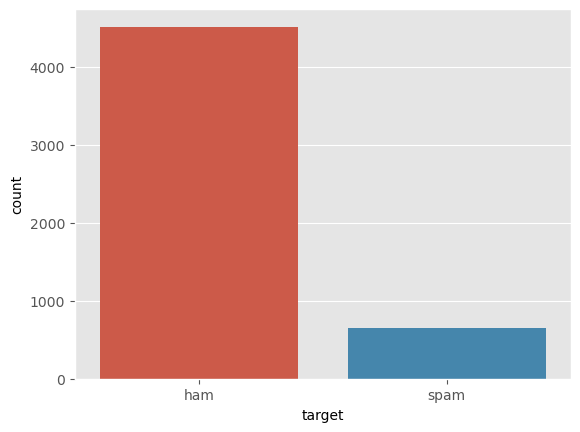

In [43]:
## Plot countplot
plt.style.use("ggplot")
sns.countplot(x = "target", data = data)

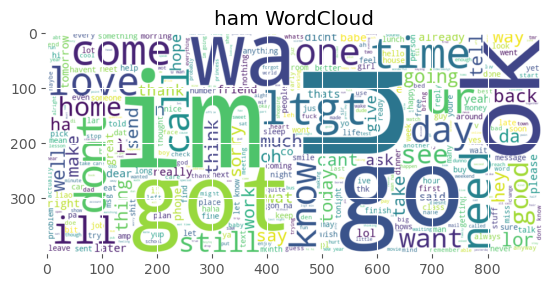

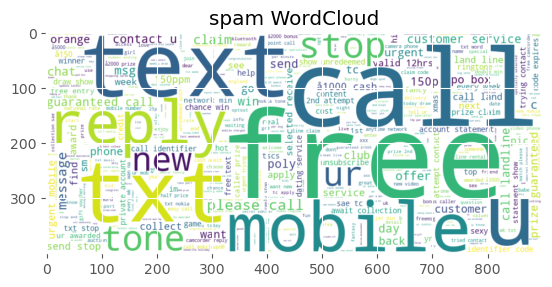

In [67]:
## Check word cloud for ham and Spam
## Check for ham

for i in ["ham","spam"]:
    Words= " ".join(data.loc[data['target'] == i]["cleaned_sms"])

    wordcloud = WordCloud(max_words=400, width=900, height=400, background_color='white').generate(Words)
    plt.imshow(wordcloud , interpolation = "bilinear")
    plt.title(f"{i} WordCloud")
    plt.show()

# Model Selection
  - In this section we will try to TF-IDF technique and try to predict accuracy on model.

In [77]:
## import necessary library for
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC 
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [72]:
#Convert sentiment labels to numerical values for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['target_encoded'] = label_encoder.fit_transform(data['target'])


class_names= list(label_encoder.classes_)
class_names

['ham', 'spam']

In [74]:
data.head()

,target,sms,cleaned_sms,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though,0


### Split the data to test and train

In [100]:
## Split the data
x = data["cleaned_sms"]
y = data["target_encoded"]

## Using TfidfVectorizer technique
vectorizer = TfidfVectorizer()
x_trans= vectorizer.fit_transform(x)


x_train ,x_test ,y_train ,y_test = train_test_split(x_trans ,y ,test_size = 0.3 ,random_state = 42)

In [101]:
print("x train ",x_train.shape )
print("x_test" ,x_test.shape)
print("y_train" ,y_train.shape)
print("y test" ,y_test.shape)

x train  (3618, 8856)
x_test (1551, 8856)
y_train (3618,)
y test (1551,)


### Model Training and Testing

In [107]:
## Function for training amd testing

def model_train_test(model):
    model.fit(x_train ,y_train)
    print("Model Score on Training data",model.score(x_train ,y_train))
    print("Model Score on Testing data",model.score(x_test ,y_test))
    y_pred = model.predict(x_test)
    print(classification_report(y_pred ,y_test))


    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
    sns.heatmap(cm, annot=True, fmt='d', cbar=False, 
                xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')
    plt.show()
    return model

## MultinomialNB

Model Score on Training data 0.9637921503593145
Model Score on Testing data 0.9471308833010961
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1413
           1       0.63      1.00      0.77       138

    accuracy                           0.95      1551
   macro avg       0.81      0.97      0.87      1551
weighted avg       0.97      0.95      0.95      1551



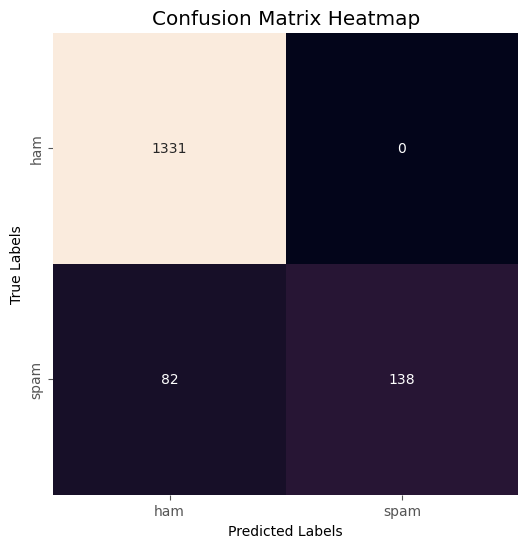

MultinomialNB()

In [108]:
mnb = MultinomialNB()
model_train_test(mnb)

## LogisticRegression

Model Score on Training data 0.9546710889994472
Model Score on Testing data 0.9329464861379755
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1421
           1       0.56      0.95      0.70       130

    accuracy                           0.93      1551
   macro avg       0.78      0.94      0.83      1551
weighted avg       0.96      0.93      0.94      1551



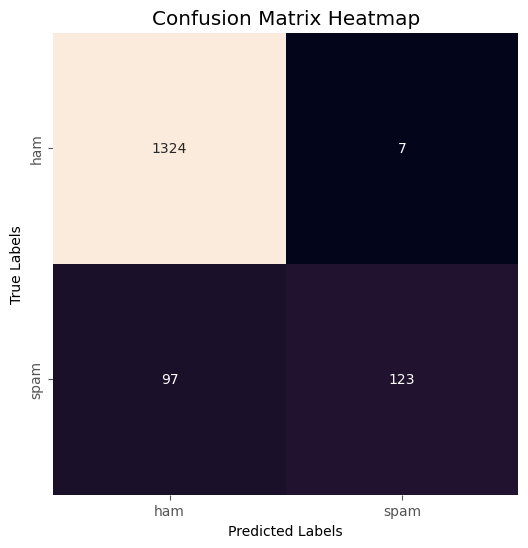

LogisticRegression()

In [109]:
lr = LogisticRegression()
model_train_test(lr)

## Support Vector Machine

Model Score on Training data 0.9972360420121614
Model Score on Testing data 0.9761444229529336
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1362
           1       0.85      0.98      0.91       189

    accuracy                           0.98      1551
   macro avg       0.92      0.98      0.95      1551
weighted avg       0.98      0.98      0.98      1551



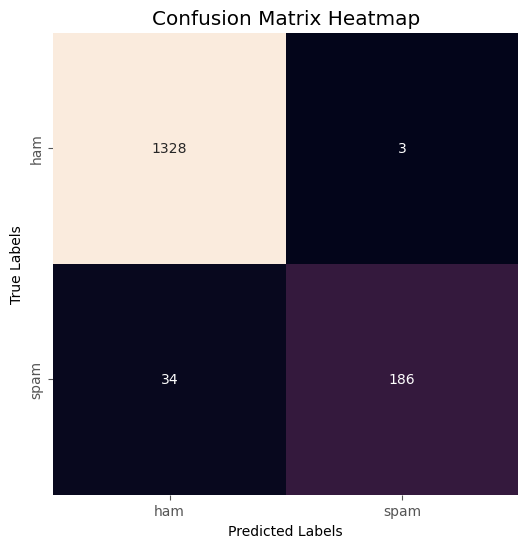

In [111]:
svc = SVC(C=1.2 ,kernel = "linear")
model = model_train_test(svc)

# Deployment

In [124]:
new_mail=["Congratulations on your recent achievement! Well done."]
new_data_features=vectorizer.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]== 0):
    print("Ham Mail")
else:
    print("Spam Mail")

[0]
Ham Mail


# Thank you😊